# Importing the required Packages

In [1]:
import pandas as pd
import numpy as np
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import scipy.stats as ss
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

%matplotlib inline

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
cars = pd.read_csv("used_cars_data.csv")

In [3]:
# random sample of the data
cars.sample(20, random_state=1)  # setting the random_state will ensure we get the same results every time

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [4]:
print(f"There are {cars.shape[0]} rows and {cars.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


In [5]:
#check for duplicate values
cars.duplicated().sum()

0

In [6]:
# checking the names of the columns in the data
print(cars.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


#  We see that  Price, Engine CC & Power are objects in the table above\

In [8]:
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [9]:
#looking at the statistical summary of the cars data
cars.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Undertanding the Unique Values

In [10]:
cars['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998,
       1996])

In [11]:
cars['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [12]:
cars['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [13]:
cars['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
cars['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [15]:
cars['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [16]:
cars['Seats'].unique()
#we see that there are nan values

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

# Droping columns

In [17]:
#S.No is not needed
cars.drop("S.No.",axis=1, inplace=True)

In [18]:
#Drop New Price as it is not required
cars.drop("New_Price",axis=1, inplace=True)

# Removing kmpl and km/kg from mileage as they are the same

In [19]:
var = ["Mileage"]

for col in var:
    cars[col] = (
        cars[col].str.rstrip("kmpl")
    )  # removing the kmpl
    cars[col] = cars[col].replace("")

In [20]:
for col in var:
    cars[col] = (
        cars[col].str.rstrip("km/kg")
    )  # removing the km/kg
    cars[col] = cars[col].replace("")

In [21]:
#converting miles to float as it is a object
#replace value with mean
cars['Mileage']=cars ['Mileage'].astype('float')

# Remving cc from Engine and removing Bhp from Power

In [22]:
var1 = ["Engine"]

for col in var1:
    cars[col] = (
        cars[col].str.rstrip("CC")
    )  # removing the cc
    cars[col] = cars[col].replace("")

In [23]:
var2 = ["Power"]

for col in var2:
    cars[col] = (
        cars[col].str.rstrip("bhp")
    )  # removing the bhp
    cars[col] = cars[col].replace("")

In [24]:
##converting Engine, Power to float as it is a object

In [25]:
cars['Engine']=cars ['Engine'].astype('float')

In [26]:
cars['Power']=cars ['Power'].astype('float')

# Renaming coloums Mileage, Power and Engine

In [27]:
cars = cars.rename(columns = {"Mileage":"Mileage_Kmpl","Power":"Power_Bhp","Engine":"Engine_CC"})

In [28]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Kmpl,Engine_CC,Power_Bhp,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [29]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Kmpl,Engine_CC,Power_Bhp,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [30]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage_Kmpl       7251 non-null   float64
 8   Engine_CC          7207 non-null   float64
 9   Power_Bhp          7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [31]:
#most missing values
cars.isnull().sum().sort_values(ascending=False)

Price                1234
Power_Bhp             175
Seats                  53
Engine_CC              46
Mileage_Kmpl            2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [32]:
cars.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage_Kmpl,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine_CC,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power_Bhp,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


# Replacing Null values with Mean, Mode

In [33]:
cars["Mileage_Kmpl"].fillna(cars["Mileage_Kmpl"].mean(), inplace = True)
cars["Power_Bhp"].fillna(cars["Power_Bhp"].mean(), inplace = True)
cars["Engine_CC"].fillna(cars["Engine_CC"].mean(), inplace = True)
cars["Seats"].fillna(cars["Seats"].median(), inplace = True)


In [34]:
#checking null values
cars.isnull().sum().sort_values(ascending=False)

Price                1234
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_Kmpl            0
Engine_CC               0
Power_Bhp               0
Seats                   0
dtype: int64

In [35]:
cars.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [36]:
cars.Seats.median()

5.0

In [37]:
#dropping rows where price is not given as it a key factor for prediction
cars=cars[cars['Price'].notna()]

In [38]:
cars.isnull().sum().sort_values(ascending=False)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage_Kmpl         0
Engine_CC            0
Power_Bhp            0
Seats                0
Price                0
dtype: int64

In [39]:
cars.shape

(6019, 12)

In [40]:

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in cars.dtypes[cars.dtypes == 'object'].index:
    val_counts = cars[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Honda City 1.5 S MT           34
Maruti Swift Dzire VDI        34
Maruti Swift VDI BSIV         31
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Name: Name, dtype: int64
Only displaying first 10 of 1876 values.



Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64





# Univariative Analysis

In [41]:


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

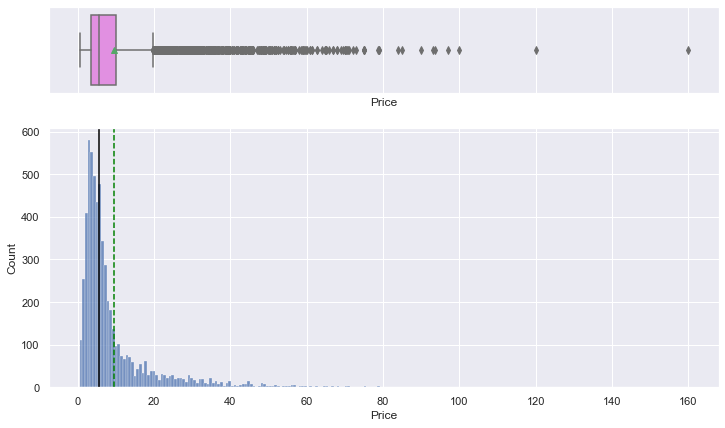

In [42]:
histogram_boxplot(cars,"Price")
#Distrubution is right-skewed with median less than 10 lakhs

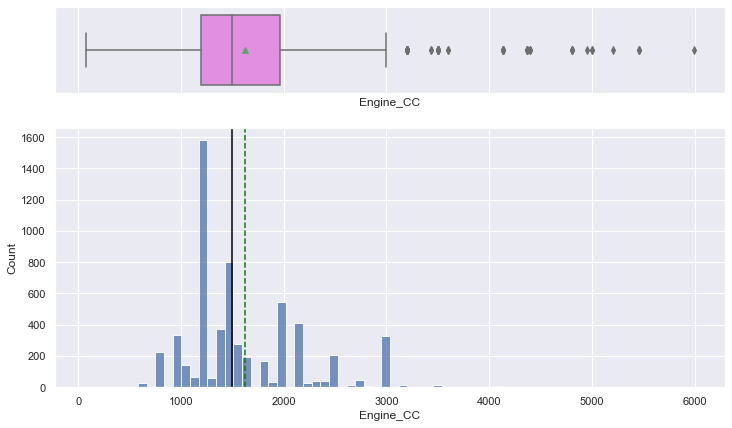

In [43]:
histogram_boxplot(cars, "Engine_CC")

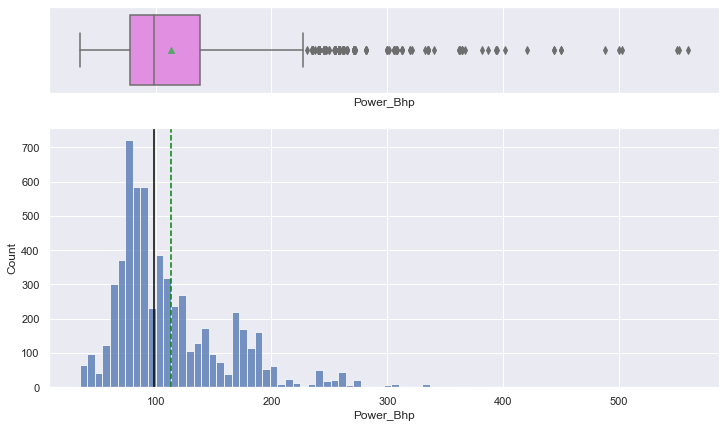

In [44]:
histogram_boxplot(cars, "Power_Bhp")

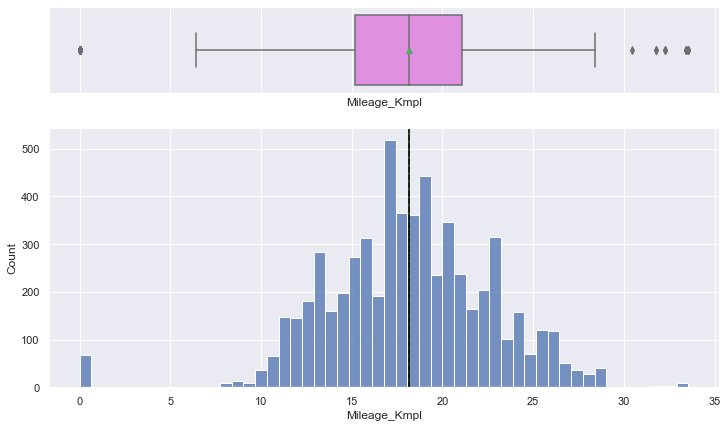

In [45]:
histogram_boxplot(cars, "Mileage_Kmpl")

In [46]:

def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

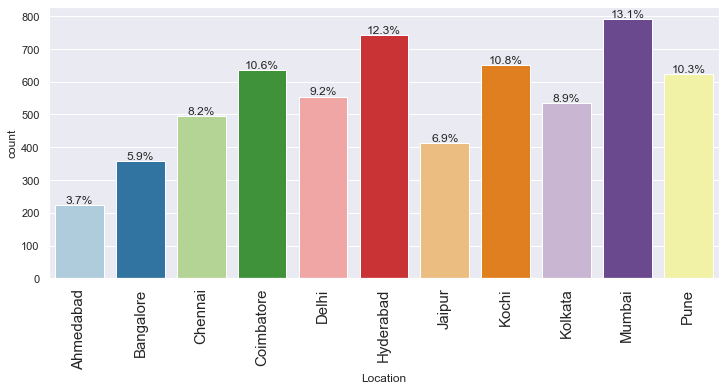

In [47]:
labeled_barplot(cars, "Location", perc=True)
#we see the distribution of cars

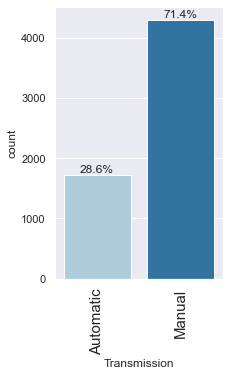

In [48]:
labeled_barplot(cars, "Transmission", perc=True)
#we see 71.4 % cars are manual

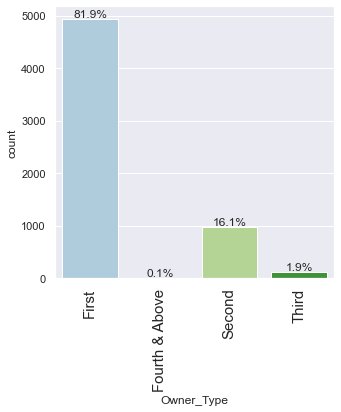

In [49]:
labeled_barplot(cars, "Owner_Type", perc=True)
#we see that almost 82% of the cars are First hand

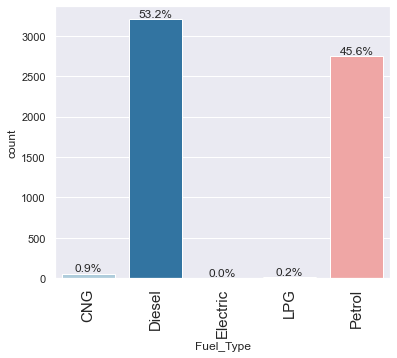

In [50]:
labeled_barplot(cars, "Fuel_Type", perc=True)
#we see that most of the cars are Diesel followed by petrol and the none exist in the electric category

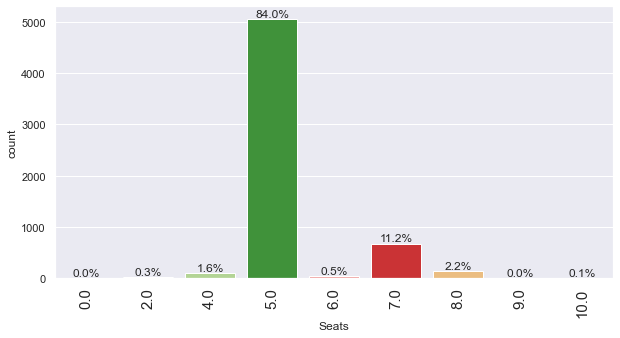

In [51]:
labeled_barplot(cars, "Seats", perc=True)
#we see that most of the cars have 5 sears

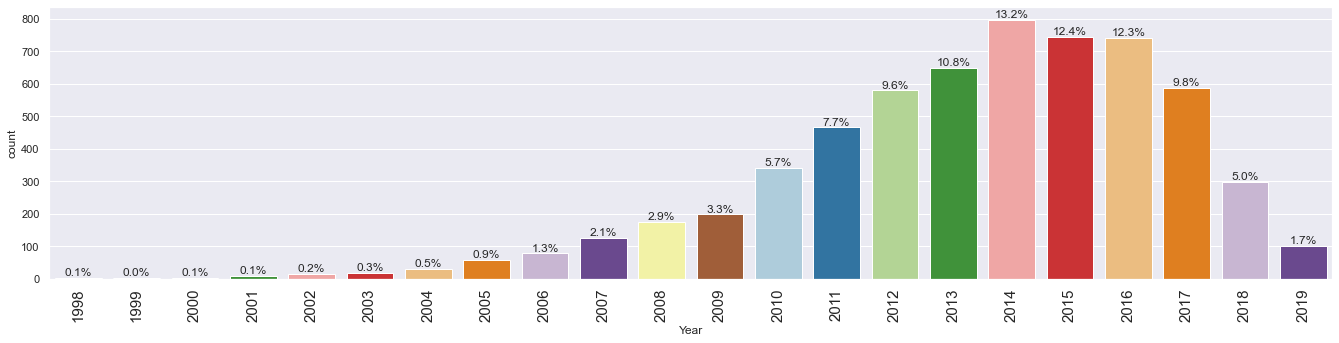

In [52]:
labeled_barplot(cars, "Year", perc=True)
#we see the distribution of years when the car was purchased

# Bivariative Analysis

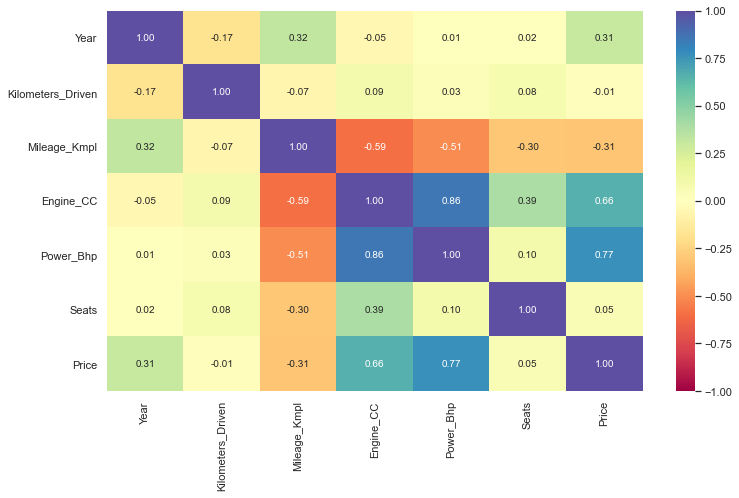

In [53]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    cars.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
#We also see the obvious one which is Power_Bhp and Engine_CC are very highly correlated
#we see that The price and Power_Bhp are highly Correlated
#We see that the Price and Engine_CC are also highly correlated

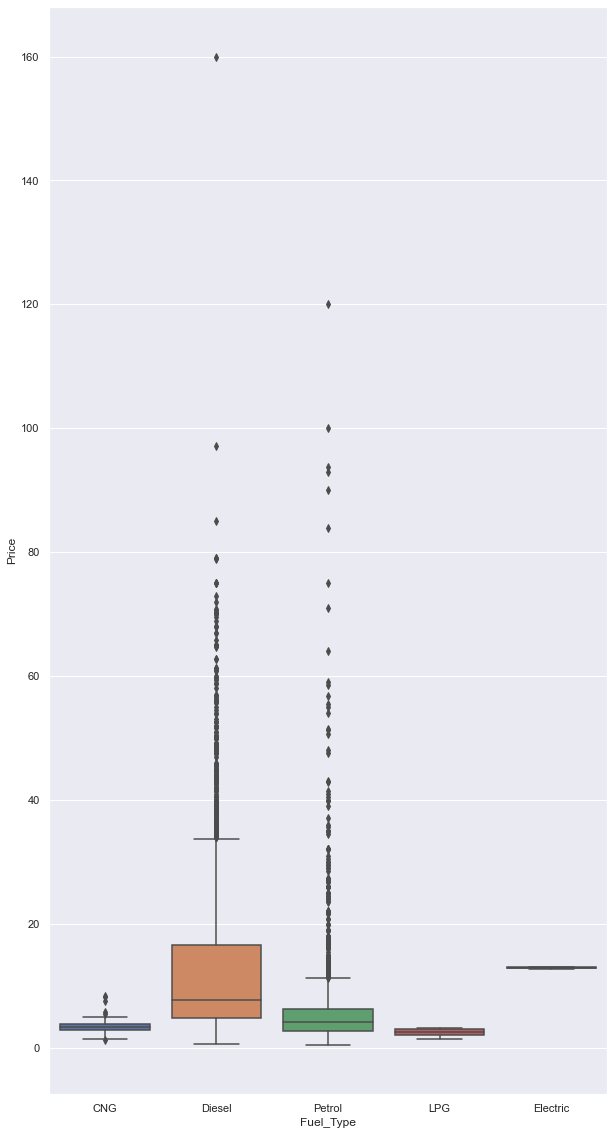

In [54]:
#Fuel Type vs Price
plt.figure(figsize=(10, 20))
sns.boxplot(x="Fuel_Type", y="Price", data=cars)
plt.show()

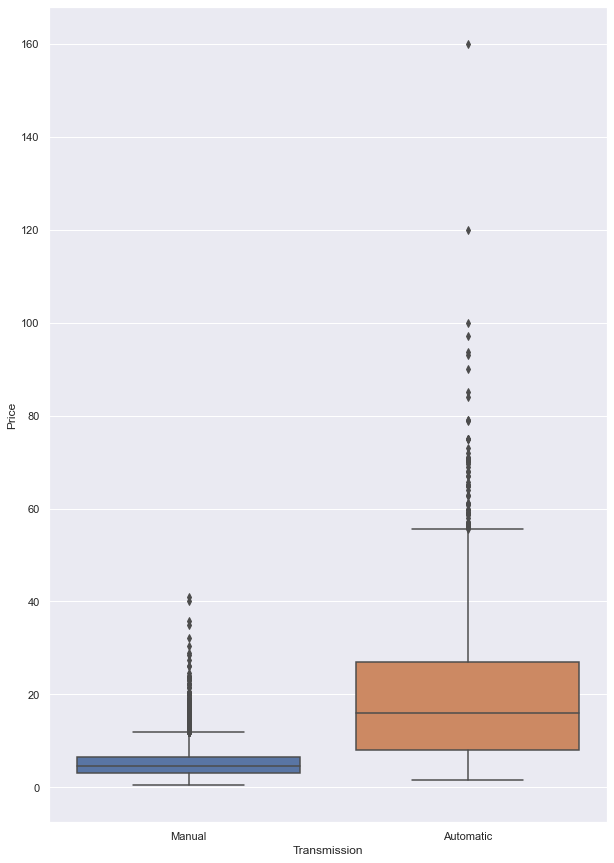

In [55]:
plt.figure(figsize=(10, 15))
sns.boxplot(x="Transmission", y="Price", data=cars)
plt.show()

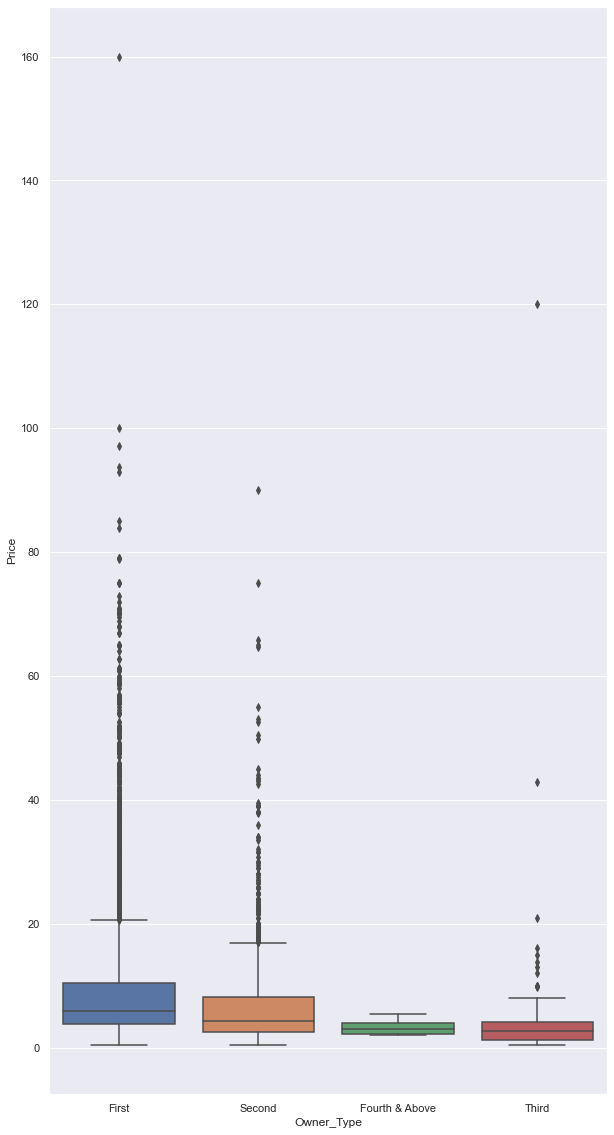

In [56]:
plt.figure(figsize=(10, 20))
sns.boxplot(x="Owner_Type", y="Price", data=cars)
plt.show()


# Outlier

In [57]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage_Kmpl,6019.0,18.134963,4.581528,0.00,15.17,18.15,21.10,33.54
Engine_CC,6019.0,1621.248321,599.553975,72.00,1198.00,1493.00,1969.00,5998.00
Power_Bhp,6019.0,113.241460,53.231071,34.20,78.00,98.60,138.03,560.00
Seats,6019.0,5.276790,0.806346,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


In [58]:
#we see that there are two outliers priced more than 100 lakhs
cars[cars['Price']>100]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Kmpl,Engine_CC,Power_Bhp,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.0


In [59]:
#we keep everything below that
cars=cars[cars['Price']<100]

# Seeing the significance the transmission has on cars

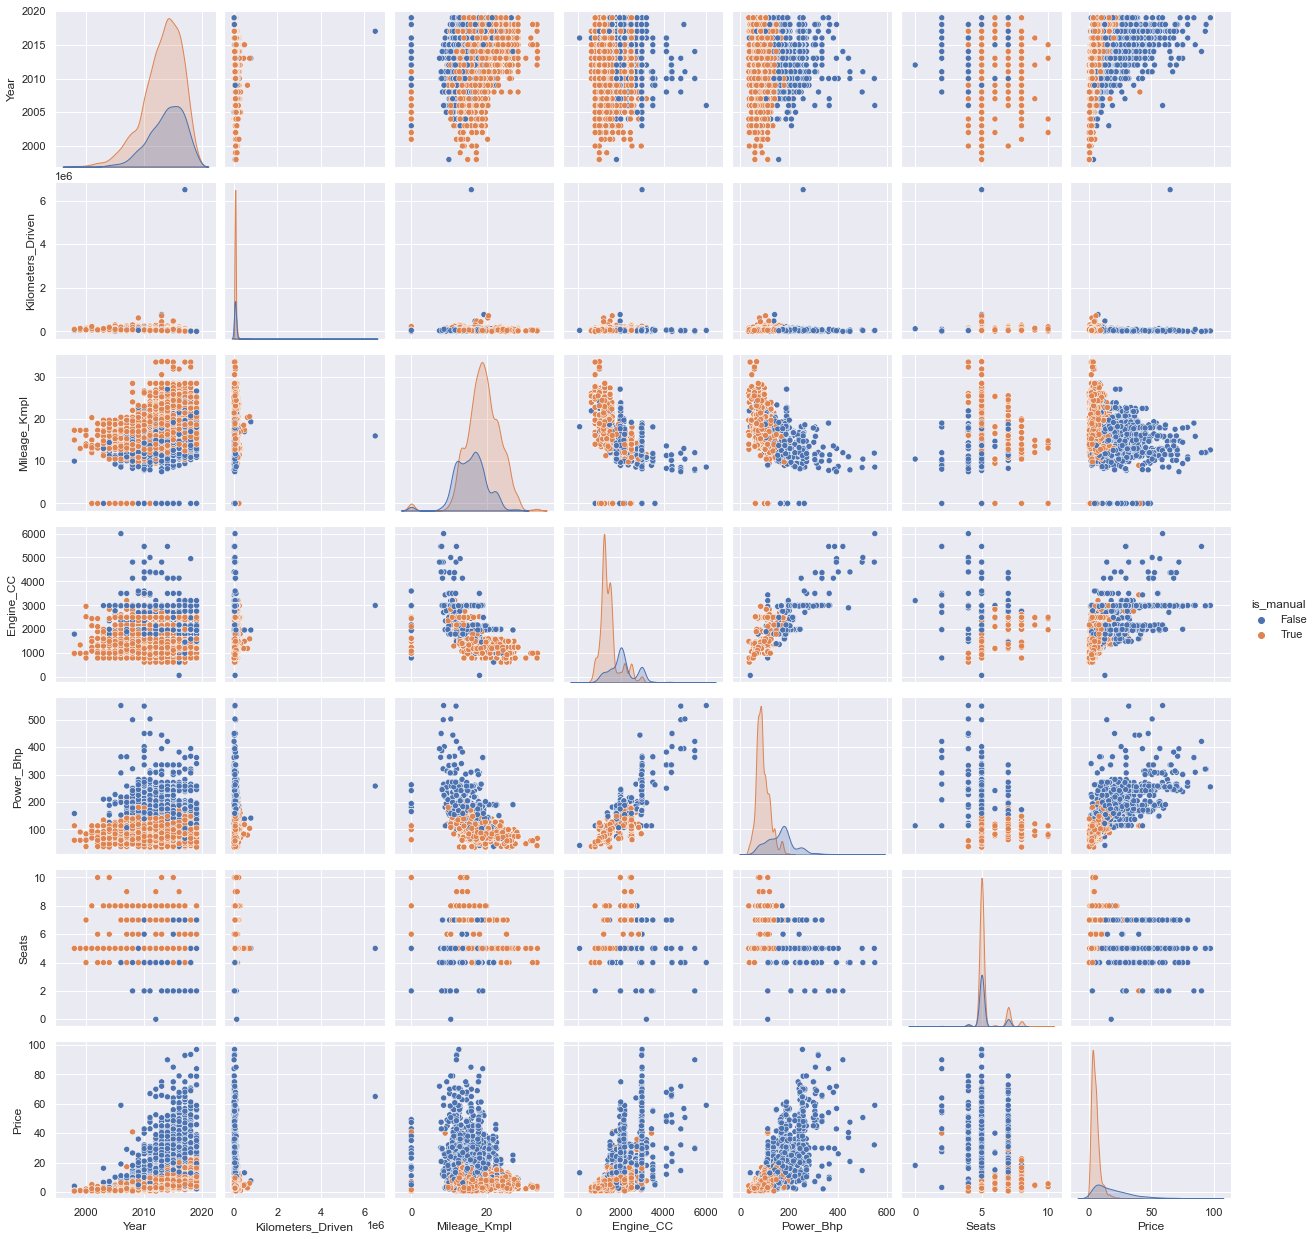

In [60]:
cars['is_manual'] = cars['Transmission'] == 'Manual'  # for hue
sns.pairplot(cars, hue = 'is_manual')
cars.drop(['is_manual'], axis=1, inplace=True)

In [61]:
cars.info

<bound method DataFrame.info of                                   Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Tran

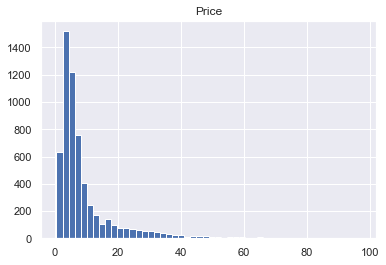

0


In [62]:
cols_to_log = ['Price']
for colname in cols_to_log:
    plt.hist(cars[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(cars[colname] <= 0))

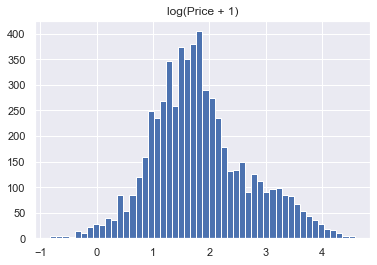

In [63]:
plt.hist(np.log(cars['Price'] ), 50)
plt.title('log(Price + 1)')
plt.show()


In [64]:
for colname in cols_to_log:
    cars[colname + '_log'] = np.log(cars[colname])
cars.drop(cols_to_log, axis=1, inplace=True)

In [65]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_Kmpl,Engine_CC,Power_Bhp,Seats,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.875822


In [66]:
df=cars.copy()

In [67]:
#defining dependent variable
X = df.drop(["Price_log"], axis=1)
y = df["Price_log"]

In [75]:
#making dummies
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Kilometers_Driven,Mileage_Kmpl,Engine_CC,Power_Bhp,Seats,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,Name_Audi A3 35 TDI Premium Plus,Name_Audi A3 35 TDI Technology,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Train and test split

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4211
Number of rows in test data = 1805


# fit linear model

In [79]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [80]:
#checking coeff
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,9.840448e-02
Kilometers_Driven,-9.800423e-07
Mileage_Kmpl,-7.052363e-03
Engine_CC,-1.061195e-04
Power_Bhp,-6.338063e-05
...,...
Transmission_Manual,-1.423776e+00
Owner_Type_Fourth & Above,-1.608000e-01
Owner_Type_Second,-5.128763e-02
Owner_Type_Third,-1.278918e-01


In [81]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# for MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def model_performance_regression(model, predictors, target):
 
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  #for r2
    adjr2 = adj_r2_score(predictors, target, pred)  #for adjusted R
    rmse = np.sqrt(mean_squared_error(target, pred))  # for RMSE
    mae = mean_absolute_error(target, pred)  # for MAE
    mape = mape_score(target, pred)  # for MAPE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [82]:
#for train
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.108374,0.069318,0.984707,0.972177,inf


In [83]:
#for test
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.368427,0.201336,0.816659,4.595069,inf
